In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("./CardioVascularDisease/CardioVascularDisease/cardio_train.csv",sep=";")
age_y=data['age']/365
data['age_years'] = age_y.round()
data=data.drop(['id'],axis=1)
data=data.drop(['age'],axis=1)
data.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,155,69.0,130,80,2,2,0,0,1,0,62.0
1,1,163,71.0,110,70,1,1,0,0,1,1,40.0
2,1,165,70.0,120,80,1,1,0,0,1,0,60.0
3,2,165,85.0,120,80,1,1,1,1,1,0,40.0
4,1,155,62.0,120,80,1,1,0,0,1,0,64.0
5,1,164,61.0,100,70,1,1,0,0,1,0,58.0
6,1,162,72.0,100,70,1,1,0,0,1,0,50.0
7,1,161,93.0,140,90,2,1,0,0,1,1,62.0
8,1,157,68.0,110,80,1,1,0,0,1,0,58.0
9,1,158,65.0,140,90,3,1,0,0,1,1,61.0


In [50]:
feature = data.drop(['cardio'],axis = 1)
target= data.cardio

In [51]:
#Normalization
x = (feature - np.min(feature)) / (np.max(feature) - np.min(feature)).values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,target,test_size = 0.2,random_state=0)

In [53]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [55]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 64.58%


In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

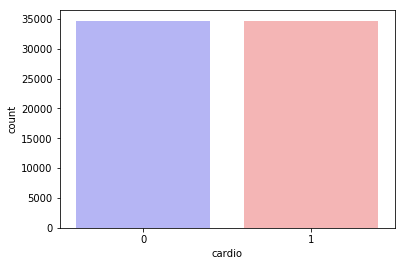

In [2]:
sns.countplot(x="cardio", data=data, palette="bwr")
plt.show()

In [3]:

countNoDisease = len(data[data.cardio == 0])
countHaveDisease = len(data[data.cardio == 1])
print("Percentage of Patients Haven't cardio Disease: {:.2f}%".format((countNoDisease / (len(data.cardio))*100)))
print("Percentage of Patients Have cardio Disease: {:.2f}%".format((countHaveDisease / (len(data.cardio))*100)))

Percentage of Patients Haven't cardio Disease: 50.04%
Percentage of Patients Have cardio Disease: 49.96%


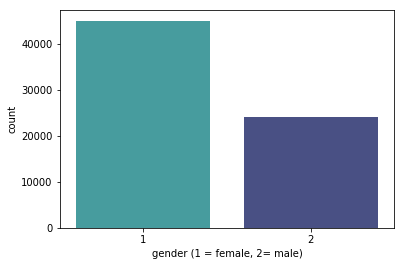

In [4]:
sns.countplot(x='gender', data=data, palette="mako_r")
plt.xlabel("gender (1 = female, 2= male)")
plt.show()

In [5]:
countFemale = len(data[data.gender == 1])
countMale = len(data[data.gender == 2])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.gender))*100)))

Percentage of Female Patients: 65.05%
Percentage of Male Patients: 34.95%


In [6]:
data.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,50349.657660,18881.830531,1.345425,164.452522,71.586058,120.446034,84.314225,1.216759,1.175524,0.092361,0.055509,0.818103
1,50593.503697,20056.708365,1.353619,164.271764,76.824305,137.226937,109.006268,1.517099,1.277454,0.083733,0.052250,0.789845


In [ ]:
pd.crosstab(data.cardio,data.age).plot(kind="bar",figsize=(20,6))
plt.title('cardio Disease Frequency for Ages')
plt.xlabel('fre')
plt.ylabel('age')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,64.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


In [10]:
#Removing the  age column 
data=data.drop(['age'],axis=1)
data

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,988,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,989,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,990,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,991,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,992,1,155,62.0,120,80,1,1,0,0,1,0,64.090411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69297,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69298,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69299,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


In [4]:
#checking the null rows
data['cardio'].value_countscounts()

0    34679
1    34622
Name: cardio, dtype: int64

In [12]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,1,155,62.0,120,80,1,1,0,0,1,0,64.090411


In [13]:
feature = data.drop(['cardio'],axis = 1)
feature

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,1,155,69.0,130,80,2,2,0,0,1,61.558904
1,1,163,71.0,110,70,1,1,0,0,1,40.131507
2,1,165,70.0,120,80,1,1,0,0,1,60.002740
3,2,165,85.0,120,80,1,1,1,1,1,39.860274
4,1,155,62.0,120,80,1,1,0,0,1,64.090411
...,...,...,...,...,...,...,...,...,...,...,...
69296,2,168,76.0,120,80,1,1,1,0,1,52.712329
69297,1,158,126.0,140,90,2,2,0,0,1,61.920548
69298,2,183,105.0,180,90,3,1,0,1,0,52.235616
69299,1,163,72.0,135,80,1,2,0,0,0,61.454795


In [67]:
#Remove which rows are zero
feature = feature.to_numpy()
feature

array([[  1.        , 155.        ,  69.        , ...,   0.        ,
          1.        ,  61.55890411],
       [  1.        , 163.        ,  71.        , ...,   0.        ,
          1.        ,  40.13150685],
       [  1.        , 165.        ,  70.        , ...,   0.        ,
          1.        ,  60.00273973],
       ...,
       [  2.        , 183.        , 105.        , ...,   1.        ,
          0.        ,  52.23561644],
       [  1.        , 163.        ,  72.        , ...,   0.        ,
          0.        ,  61.45479452],
       [  1.        , 170.        ,  72.        , ...,   0.        ,
          1.        ,  56.2739726 ]])

In [14]:
target=data['cardio']
#target=target.to_numpy()
target

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [15]:
# Normalize
import numpy as np
x = (feature - np.min(feature)) / (np.max(feature) - np.min(feature)).values

In [16]:
x

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,0.0,0.512821,0.310526,0.017316,0.013550,0.5,0.5,0.0,0.0,1.0,0.903678
1,0.0,0.553846,0.321053,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0,0.298103
2,0.0,0.564103,0.315789,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.859698
3,1.0,0.564103,0.394737,0.016698,0.013550,0.0,0.0,1.0,1.0,1.0,0.290437
4,0.0,0.512821,0.273684,0.016698,0.013550,0.0,0.0,0.0,0.0,1.0,0.975223
...,...,...,...,...,...,...,...,...,...,...,...
69296,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0,0.653659
69297,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0,0.913899
69298,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0,0.640186
69299,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0,0.900736


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,target,test_size = 0.2,random_state=0)

In [20]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [21]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [22]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [23]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [24]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [25]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [26]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [27]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

ValueError: Length of passed values is 1, index implies 55440

In [30]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 64.69%


In [31]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 56.64%


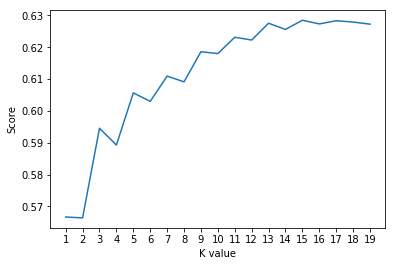

Maximum KNN Score is 62.85%


In [32]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

In [7]:
import seaborn as sns
sns.countplot(x="target",data=data,palette="bwr")

ValueError: Could not interpret input 'target'

In [70]:

data['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

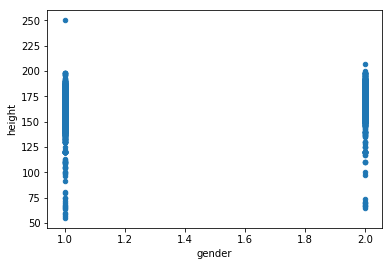

In [71]:
%matplotlib inline
data.plot.scatter('gender','height')

age            23713.000000
gender             2.000000
height           250.000000
weight           200.000000
ap_hi          16020.000000
ap_lo          11000.000000
cholesterol        3.000000
gluc               3.000000
smoke              1.000000
alco               1.000000
active             1.000000
cardio             1.000000
age_years         64.967123
dtype: float64


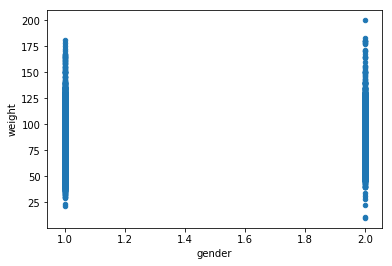

In [61]:
%matplotlib inline
print( data.max())
data.plot.scatter('gender','weight')

In [26]:
dt.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,155,69.0,130,80,2,2,0,0,1,0,61.558904
1,1,163,71.0,110,70,1,1,0,0,1,1,40.131507
2,1,165,70.0,120,80,1,1,0,0,1,0,60.002740
3,2,165,85.0,120,80,1,1,1,1,1,0,39.860274
4,1,155,62.0,120,80,1,1,0,0,1,0,64.090411


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.isnull().T.any().T.sum()

0

In [11]:
!pip install pyod
!pip install --upgrade pyod 

  Created wheel for pyod: filename=pyod-0.7.9-py3-none-any.whl size=105572 sha256=fa1fa44c85811743001cb0b5c33d964e2f38676cfac0d87156299c12184701e6
  Stored in directory: c:\users\suman\appdata\local\pip\cache\wheels\ba\8e\d6\9112bc73ee4ee502e6e090f67913bc5259cbff67af5a6878e3
  Created wheel for combo: filename=combo-0.1.0-py3-none-any.whl size=42047 sha256=5ad84e78fb202f1c4b3264aacdad8a55375f0af80bb20371e9fadc25879a6932
  Stored in directory: c:\users\suman\appdata\local\pip\cache\wheels\be\46\35\bbbd75ccee1dce45c6a0e8ba2e5c0532716f131ed3b59829c7
  Created wheel for suod: filename=suod-0.0.4-py3-none-any.whl size=2167161 sha256=38470621573af917b840d7f60baeab9c207ffcc3e9e4a4a384ae461eb3d6fb60
  Stored in directory: c:\users\suman\appdata\local\pip\cache\wheels\21\44\a8\ba508e4a93b9554e081c88cd120b027b28a10bef454ca07b5d
Successfully built pyod combo suod


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already up-to-date: pyod in c:\users\suman\anaconda3\envs\obj\lib\site-packages (0.7.9)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [76]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
#Y = iris.target
X=feature
Y=target
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)


Automatically created module for IPython interactive environment


C:\Users\Suman\Anaconda3\envs\obj\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
clf = LogisticRegression(random_state=0).fit(feature, target)

C:\Users\Suman\Anaconda3\envs\obj\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
 clf.predict(feature[:2, :])

array([1, 0], dtype=int64)

In [83]:
clf.score(feature, target)

0.7069450657277673

In [84]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(feature, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
print(clf.predict(feature[:2, :]))

[1 0]


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
X = feature
y=target
rng = np.random.RandomState(0)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1


<Figure size 1944x648 with 0 Axes>

In [93]:
datasets

[(array([[ 0.03159499,  0.98698776],
         [ 2.11509784, -0.04624397],
         [ 0.88248972, -0.07575606],
         [-0.0551441 , -0.03733246],
         [ 0.82954503, -0.53932149],
         [ 2.11285708,  0.66208353],
         [ 0.5696927 ,  0.33744136],
         [ 0.95217454, -0.75307471],
         [-0.02922115,  0.39287336],
         [ 1.71579557,  0.36069454],
         [-0.27883014,  0.61420539],
         [ 2.00344509, -0.3091496 ],
         [ 1.50009616, -0.74636376],
         [ 1.22540835,  1.19793017],
         [ 0.46730819,  0.54703192],
         [-0.36653222,  1.11971633],
         [ 0.30124459,  1.23315697],
         [ 0.30430746,  0.82373935],
         [-0.23712492,  0.77876034],
         [ 1.16339832,  0.55290238],
         [-0.59702417,  0.6572361 ],
         [ 0.46356735, -0.1951543 ],
         [ 0.68451111,  0.75287685],
         [ 0.70515699, -0.45892444],
         [-0.65805008, -0.12944211],
         [-0.74662946, -0.3829632 ],
         [ 0.60585226,  0.31252842],
 

In [94]:
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    print(ds_cnt)

0
1
2


In [ ]:
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()